<a href="https://colab.research.google.com/github/diana-bsv/basic_knowledge/blob/main/basic_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

import numpy as np

from IPython.display import clear_output

# Read

Images

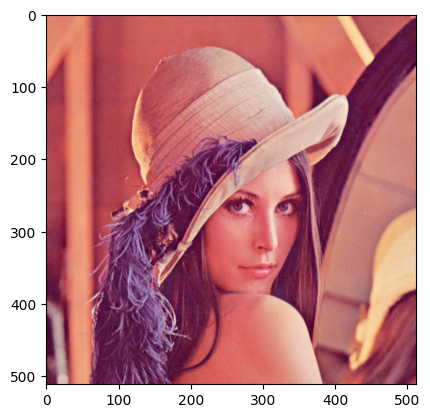

In [2]:
#default BGR

img = cv.imread("/content/lenna.png")
#in .py files use
#cv.imshow("Caption", img)
#cv.WaitKey(0)

def show(img: np.ndarray):
  if len(img.shape) == 3:
    plt.imshow(img[:,:,::-1])
  else:
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  # plt.axis("off")

def show_(img: list):
  if len(img[0].shape) == 3:
    plt.imshow(np.concatenate(img, axis = 1)[:,:,::-1])
  else:
    plt.imshow(np.concatenate(img, axis = 1), cmap='gray', vmin=0, vmax=255)
  # plt.axis("off")

show(img)

Videos

In [3]:
# capture = cv.VideoCapture('Video.avi')

# isTrue, frame = capture.read()
# try:
#   while(isTrue):
#     plt.imshow(frame[:,:,::-1])
#     plt.axis("off");
#     plt.show()

#     clear_output(wait=True)

#     isTrue, frame = capture.read()

# except KeyboardInterrupt:
#   capture.release()
#   print("Released Video Resource")

# capture.release()

#Draw

In [4]:
import numpy as np

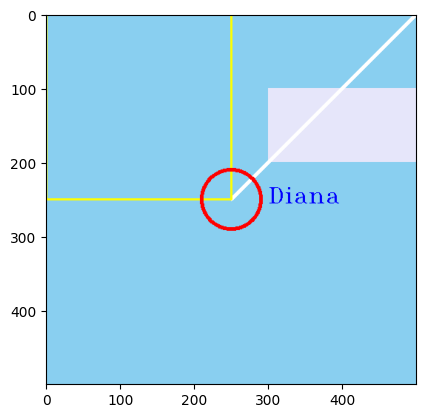

In [5]:
blank = np.zeros((500,500, 3), dtype = "uint8")

blank[:] = 240, 207, 137
blank[100:200, 300:500] = 250,230,230

cv.line(blank, (500,0), (250,250), (255,255,255), thickness = 4 )
cv.rectangle(blank, (0,0), (250,250), (0,255,255), thickness = 2 )
cv.circle(blank, (250,250), 40, (0,0,255), thickness = 3 )

cv.putText(blank, "Diana", (300,255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (255,0,0))
show(blank)

#Image transformations

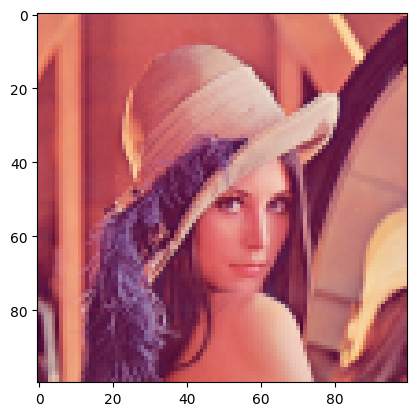

In [6]:
# resize

img_resize = cv.resize(img, (100,100), interpolation=cv.INTER_AREA)

#cv.INTER_AREA - downscaling
#cv.INTER_LINEAR, cv.INTER_CUBIC - upscaling
show(img_resize)


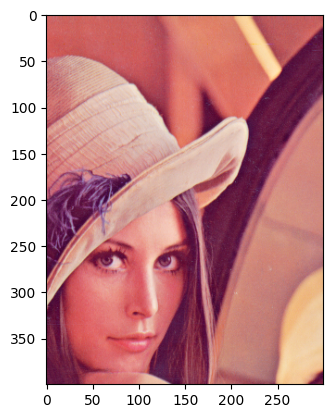

In [7]:
# cropping

img_crop = img[:400, 200:500]
show(img_crop)

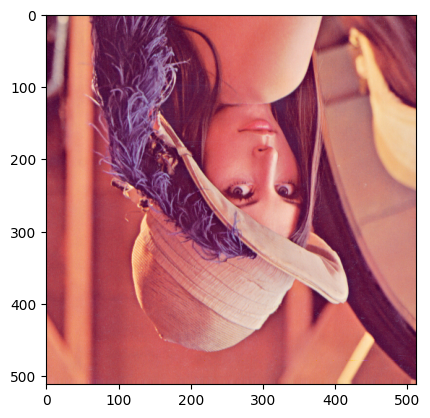

In [8]:
# Flipping

img_flip = cv.flip(img, 0)
show(img_flip)

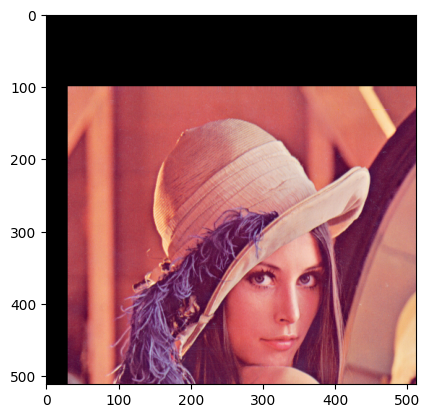

In [9]:
#Translation = shifting
# Affine translation
#[x1, x2] -> [a1*x1 + a2*x2 + a3, b1*x1 + b2*x2 + b3]

def translate(img, x, y):
  a = [1,0,x]
  b = [0,1,y]
  mat = np.float32([a, b])
  dimensions = (img.shape[1], img.shape[0])
  return cv.warpAffine(img, mat, dimensions)

show(translate(img, 30, 100))

rotation matrix:
 [[  0.8660254    0.5        -93.70250337]
 [ -0.5          0.8660254  162.29749663]]
rotation matrix:
 [[   0.76604444    0.64278761 -104.66100552]
 [  -0.64278761    0.76604444  224.44625064]]


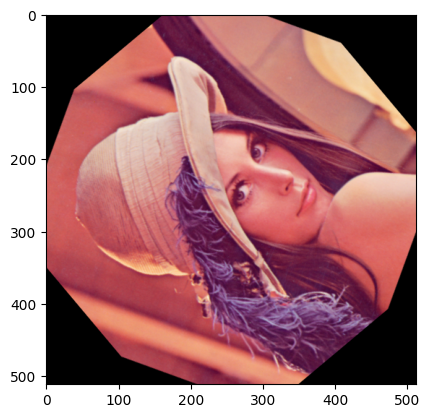

In [10]:
#rotation

def rotate(img, angle, point=None):
  dimensions = (img.shape[1], img.shape[0])
  if not point:
    point = (img.shape[1]//2, img.shape[0]//2)
  mat = cv.getRotationMatrix2D(point, angle, 1.0)
  print("rotation matrix:\n",mat)
  return cv.warpAffine(img, mat, dimensions)

show(rotate((rotate(img, 30)),40))

#Colors

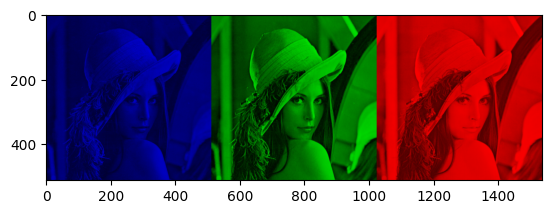

In [11]:
# color channels
b,g,r = cv.split(img)
z = np.zeros(img.shape[:2], dtype = "uint8")
show_([cv.merge((b,z,z)),cv.merge((z,g,z)),cv.merge((z,z,r))])

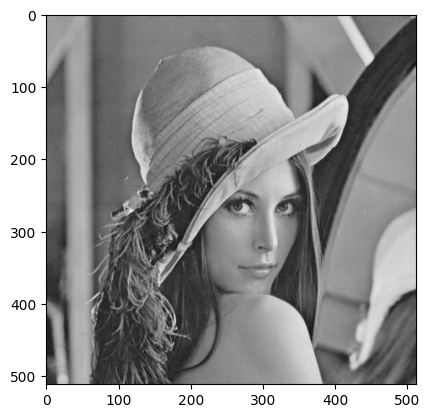

In [12]:
 #to grayscale

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
show(img_gray)

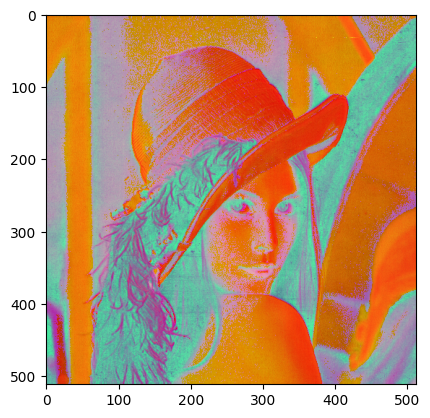

In [13]:
#to HSV hue saturation color

img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
show(img_hsv)

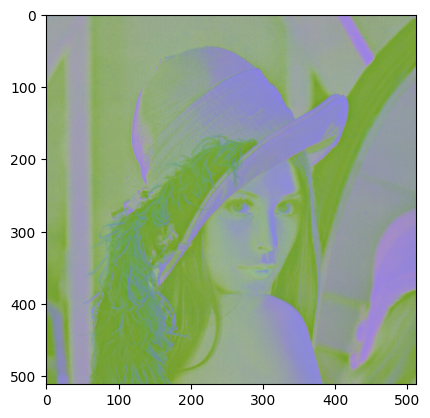

In [14]:
#to LAB - how humans perceive color

img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
show(img_lab)

# Contour Detection

          Grey and blurred               Tresholded


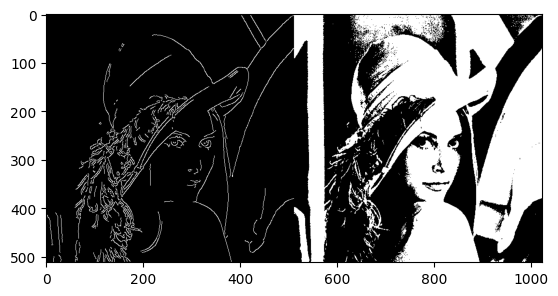

In [15]:
# edge cascade
# можем изменить количество границ применив размытие

img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_grey_blur = cv.GaussianBlur(img_grey, (3,3), cv.BORDER_DEFAULT)
img_canny = cv.Canny(img_grey_blur, 125, 175)

ret, thresh = cv.threshold(img_grey, 125, 255, cv.THRESH_BINARY)
# thresh_canny = cv.Canny(thresh, 125, 175)


print("          Grey and blurred               Tresholded")
show(np.concatenate((img_canny,  thresh), axis = 1))


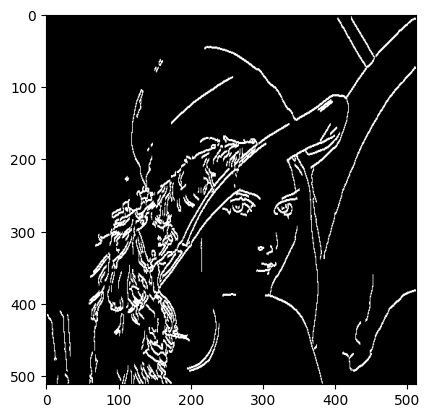

In [16]:
# dilating = сделать шире ярче
img_dil = cv.dilate(img_canny, (3,31), iterations = 2)
show(img_dil)

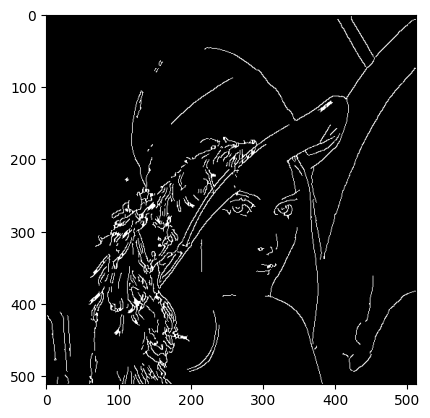

In [17]:
#eroding get edges back

img_erode = cv.erode(img_dil, (3,3), iterations = 2)
show(img_erode)

Num of contours found: 277


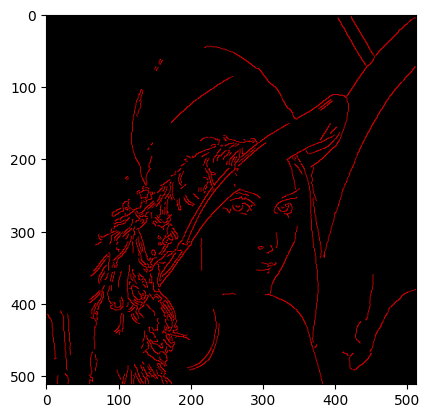

In [18]:
# Contours

contours, hierarchies = cv.findContours(img_canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
print(f"Num of contours found: {len(contours)}")

blank = np.zeros(img.shape, dtype = 'uint8')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
show(blank)

# Blurring

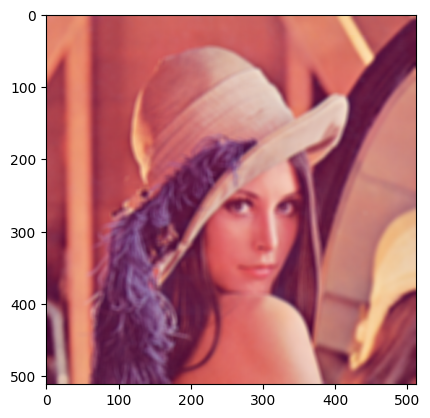

In [19]:
# average blur

img_blur = cv.blur(img, (7,7))
show(img_blur)

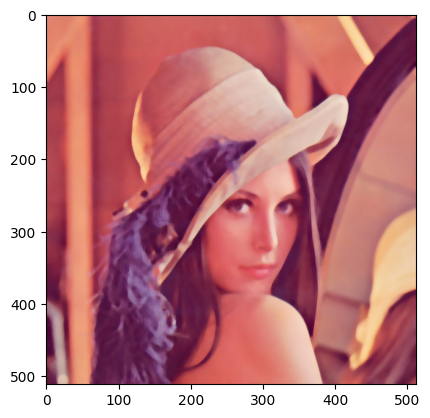

In [20]:
# Median blur - better for noise

img_blur = cv.medianBlur(img, 7)
show(img_blur)

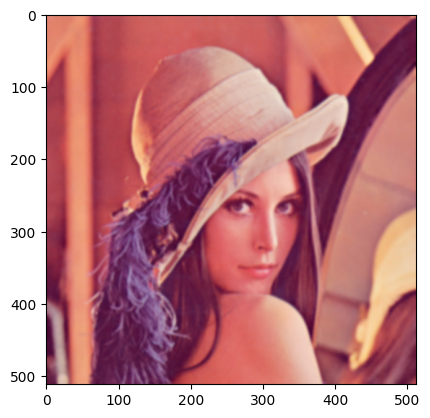

In [21]:
# Gaussian blur - keeps the edges

img_blur = cv.GaussianBlur(img, (7,7), 0)
show(img_blur)

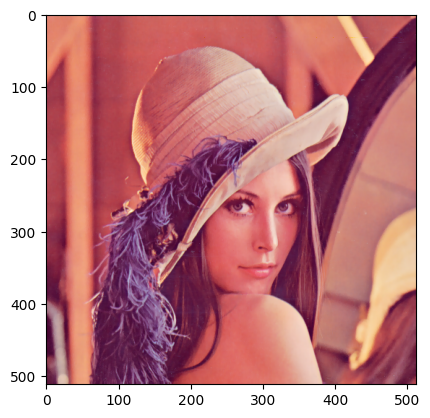

In [22]:
# Bilateral

img_blur = cv.bilateralFilter(img, 5, 15, 15)
show(img_blur)

# Bitwise operators and masking

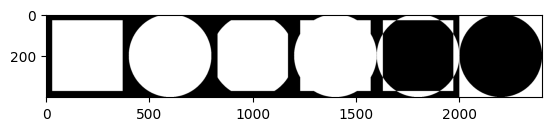

In [23]:
blank = np.zeros((400,400), "uint8")

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

show_([rectangle, circle, cv.bitwise_and(rectangle, circle), cv.bitwise_or(rectangle, circle),
       cv.bitwise_xor(rectangle, circle), cv.bitwise_not(circle.copy())])

#bitwise_not reverses image



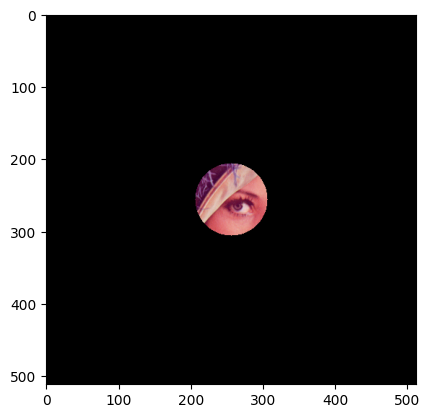

In [24]:
blank = np.zeros(img.shape[:2], "uint8")

mask = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 50, 255, -1)

masked = cv.bitwise_and(img,img, mask = mask)

show(masked)

# Histogram computation

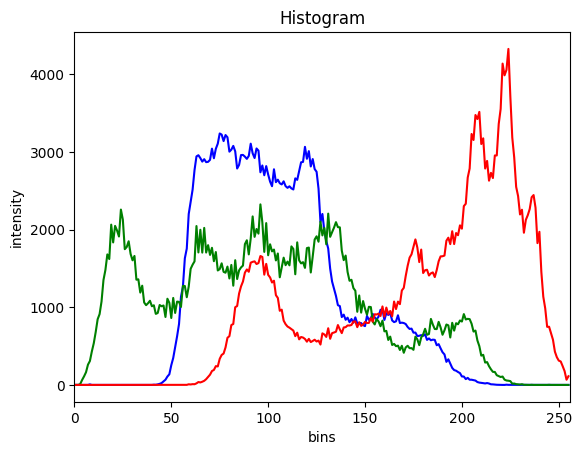

In [25]:
# img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure()
plt.title('Histogram')
plt.xlabel("bins")
plt.ylabel("intensity")

for i, c in enumerate(("b", "g", "r")):
  # channels, mask, bins, range of pxls
  gray_hist = cv.calcHist([img], [i], None, [256], [0,256])
  plt.plot(gray_hist, color = c)
  plt.xlim([0,256])



# Tresholding and edge detection



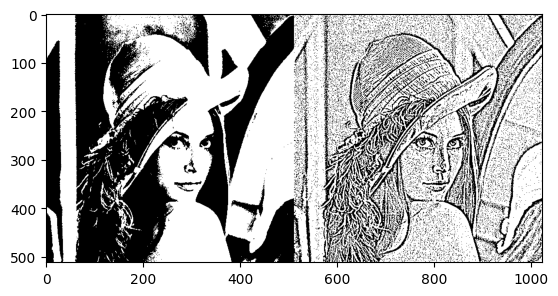

In [26]:
img_grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

threshold, thresh = cv.threshold(img_grey, 125, 255, cv.THRESH_BINARY)

#finds an optimal threshold for areas
adaptive_thresh = cv.adaptiveThreshold(img_grey, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 3)

show_([thresh, adaptive_thresh])

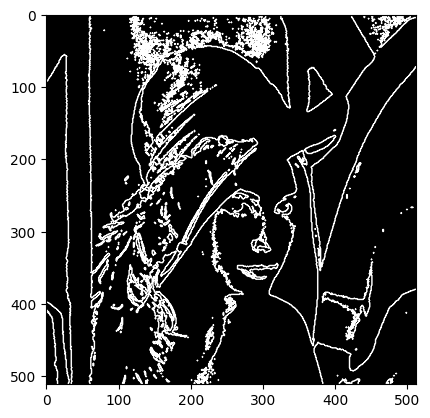

In [27]:
# Laplacian of image - computes slopes

lap = cv.Laplacian(thresh, cv.CV_64F)
lap = np.uint(np.absolute(lap))

show(lap)


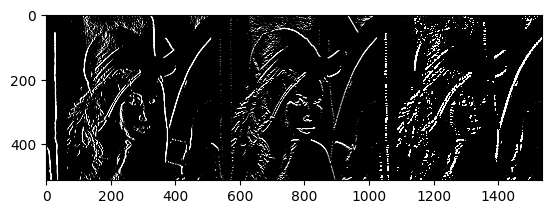

In [28]:
# Sobel

sobelx = cv.Sobel(thresh, cv.CV_64F, 1, 0)
sobely = cv.Sobel(thresh, cv.CV_64F, 0, 1)
combined_sobel = cv.bitwise_or(sobelx, sobely)

show_([sobelx, sobely, combined_sobel])

